# **Introduction**

**Pulsar stars** are neutron stars that produce radio emission, which when continuously and rapidly rotated, produce a periodic radio emission that can be detected. In astronomical research, possible pulsar stars can be identified as **‘candidates.’** Candidates are characterized by the average value of different patterns produced by the rotations for each star. Nearly 2,000 pulsars have been discovered, however there are still many more in the galaxy that have not been identified (1). 


<img src="https://media.giphy.com/media/l3dj5M4YLaFww31V6/giphy.gif" width="480" />

*Source: https://media.giphy.com/media/l3dj5M4YLaFww31V6/giphy.gif*


*A High Time Resolution Universe Survey was done to collect data on pulsar star candidates using a radio telescope. 
Of 17,898 collected candidates:
* 1,639 were pulsar stars
* remaining 16259 were RFI/noise false candidates 

These stars were characterized by **8 variables** from the integrated pulse profile and *DM-SNR curve (Dispersion Measure v. Signal-to-Noise Ratio curve)*.



The question we aim to address is:
* *Will a presented pulsar star candidate be a pulsar star?*



The data set we are working with is characterized by the following:
* **Data format**: CSV
* **Multivariate** data set (multiple variables, 8).
* Candidates are in separate rows
* Candidates in data set are described by **8 continuous variables**:
- Variables 1-4 simple stats from **pulse (folded) profile**
- Variables 6-8 simple stats from **DM-SNR curve**
- Variable 9 **class variable** [0 (negative class, non-pulars) or 1 (positive class, pulsars)]


In [2]:
library(tidyverse)
library(cowplot)
library(repr)
library(tidymodels)
set.seed(8) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Preliminary exploratory data analysis:

- Data set read from web into R using `read_csv`.
- Column names added

In [3]:
star_data <- read_csv("HTRU_2.csv", col_names=FALSE, show_col_types = FALSE) |>
    mutate(X9 = as_factor(X9))

colnames(star_data) <- c("integrated_profile_mean", "integrated_profile_st_dev", 
                         "integrated_profile_excess_kurtosis","integrated_profile_skewness",
                         "dm_snr_curve_mean","dm_snr_curve_st_dev",
                         "dm_snr_curve_excess_kurtosis","dm_snr_curve_skewness",
                         "is_pulsar_star")

sample_n(star_data, 5)

integrated_profile_mean,integrated_profile_st_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness,is_pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
120.26562,40.97150,-0.0621932,0.7003721,4.875418,27.06243,6.423170,43.4495277,0
48.07812,32.40023,3.5966131,17.3149805,64.764214,72.62912,1.105638,0.2806927,1
101.28906,35.08676,0.4551854,2.3095122,2.858696,17.61976,8.189531,80.5372445,0
147.40625,46.14624,-0.5610487,0.5355521,2.950669,17.15384,8.361733,86.4214103,0
91.66406,38.91282,0.2377319,1.5010685,3.525920,19.23582,6.971174,56.6734882,0


In [4]:
star_split <- initial_split(star_data, prop = 0.75, strata = is_pulsar_star)  

star_training_data <- training(star_split)   
star_testing_data <- testing(star_split)

sample_n(star_training_data, 5)
sample_n(star_testing_data, 5)

integrated_profile_mean,integrated_profile_st_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness,is_pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
93.46875,48.12255,0.46159507,0.6859860,1.7918060,12.09623,11.353452,182.56537,0
81.63281,38.82289,0.60677565,1.8984875,0.8963211,11.50102,15.462312,273.16024,0
87.10938,36.06055,0.73766435,2.7163270,2.5618729,19.75985,8.771769,82.96544,0
89.61719,36.51543,0.41023659,2.5995292,2.2625418,17.97103,9.206931,92.92024,0
117.78906,54.76350,0.02951264,-0.5583328,2.2056856,15.39468,9.912823,118.64161,0


integrated_profile_mean,integrated_profile_st_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness,is_pulsar_star
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
109.50781,53.17791,0.3409544,-0.2960606,2.384615,15.06311,9.6920965,119.604208,0
114.07031,45.07549,0.3725373,0.3848339,3.674749,22.45479,7.9090135,69.290189,0
103.72656,41.52648,0.2940411,0.7518841,2.852007,20.32879,7.8832463,66.391748,0
105.49219,43.50072,0.1541802,0.4081166,2.316054,19.09851,9.3772293,95.200946,0
22.96875,28.21013,6.6530311,47.9690273,127.337793,82.08953,-0.2059049,-1.154988,1


- Found number of pulsar(1) and non-pulsar(0) stars in training set, proportion similar to in original data

In [5]:
star_num_table <- star_training_data |>
    group_by(is_pulsar_star) |>
    summarize(num_stars = n())
star_num_table


is_pulsar_star,num_stars
<fct>,<int>
0,12190
1,1233


- Calculated mean of every column, grouping by non-pulsar and pulsar.

In [6]:
star_means_table <- star_training_data |>
    group_by(is_pulsar_star)|>
    summarize(across(integrated_profile_mean:dm_snr_curve_skewness, mean))
star_means_table

is_pulsar_star,integrated_profile_mean,integrated_profile_st_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,116.38515,47.28100,0.2142841,0.3875952,8.721749,23.13491,8.885170,113.86318
1,57.29433,38.77865,3.1014584,15.3668389,49.848696,56.62647,2.752613,18.23811


- Graphing various potential predictor variables as described by titles
- mean, standard deviation, excess kurtosis, skewness of integrated profile and DM-SNR curve plotted against each other

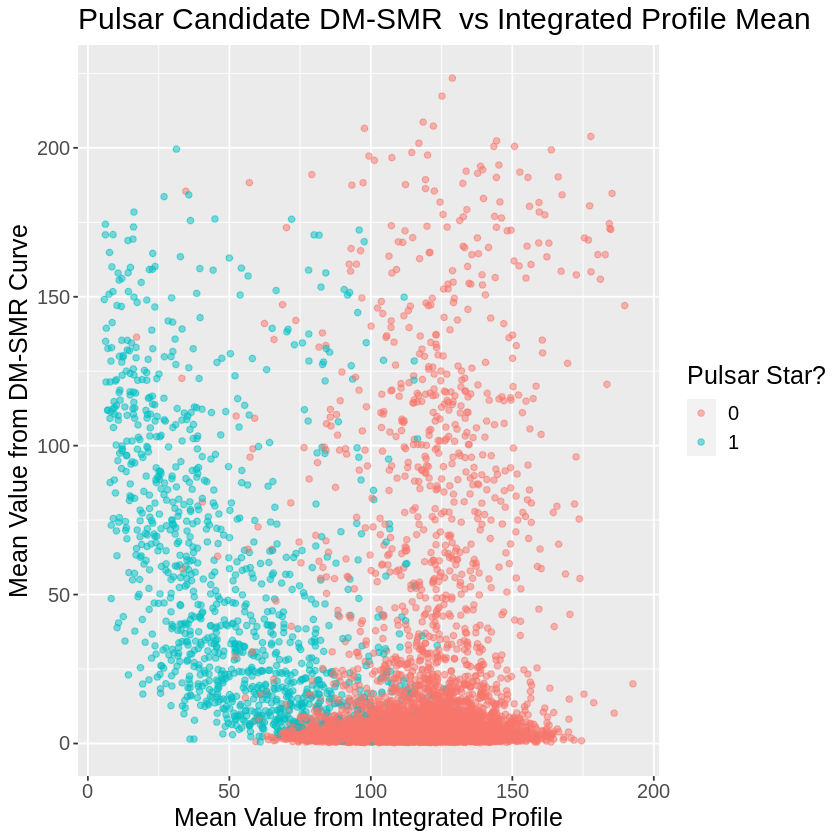

In [7]:
plot_1<- ggplot(star_training_data, aes(x = integrated_profile_mean, y = dm_snr_curve_mean, color = is_pulsar_star)) +
    geom_point(alpha=0.5) +
    labs(x = "Mean Value from Integrated Profile",
         y = "Mean Value from DM-SMR Curve",
         color = "Pulsar Star?") +
    ggtitle("Pulsar Candidate DM-SMR  vs Integrated Profile Mean") +
    theme(text = element_text(size = 15))
plot_1

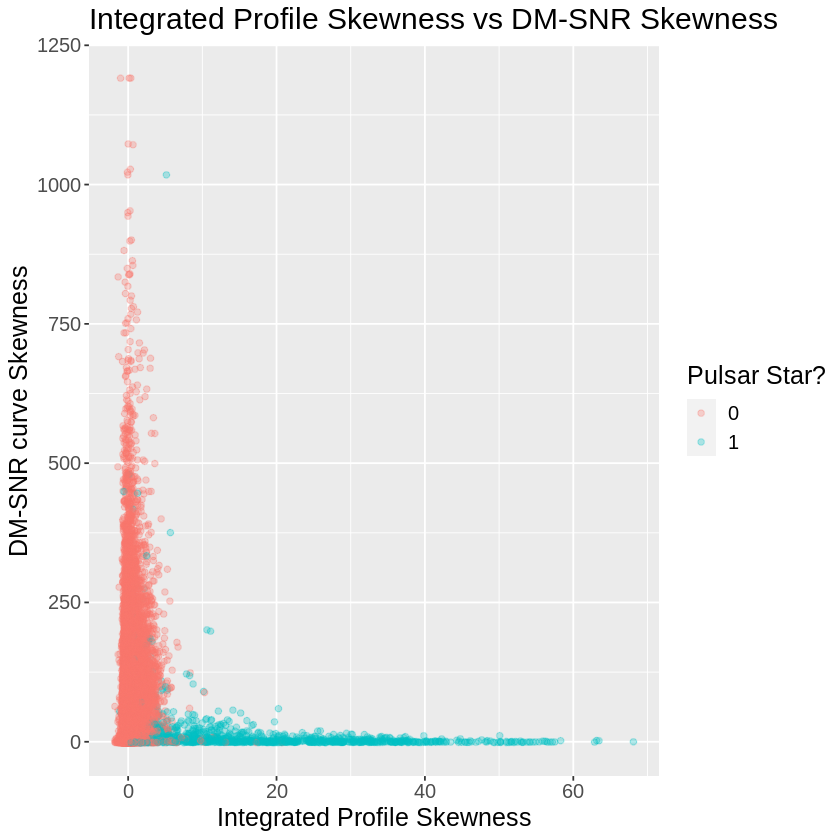

In [8]:
plot_2 <- ggplot(star_training_data, aes(x = integrated_profile_skewness, y = dm_snr_curve_skewness,
                         color = is_pulsar_star)) +
    geom_point(alpha=0.3) +
    labs(x = "Integrated Profile Skewness",
         y = "DM-SNR curve Skewness",
         color = "Pulsar Star?") +
    ggtitle("Integrated Profile Skewness vs DM-SNR Skewness") +
    theme(text = element_text(size = 15))
plot_2

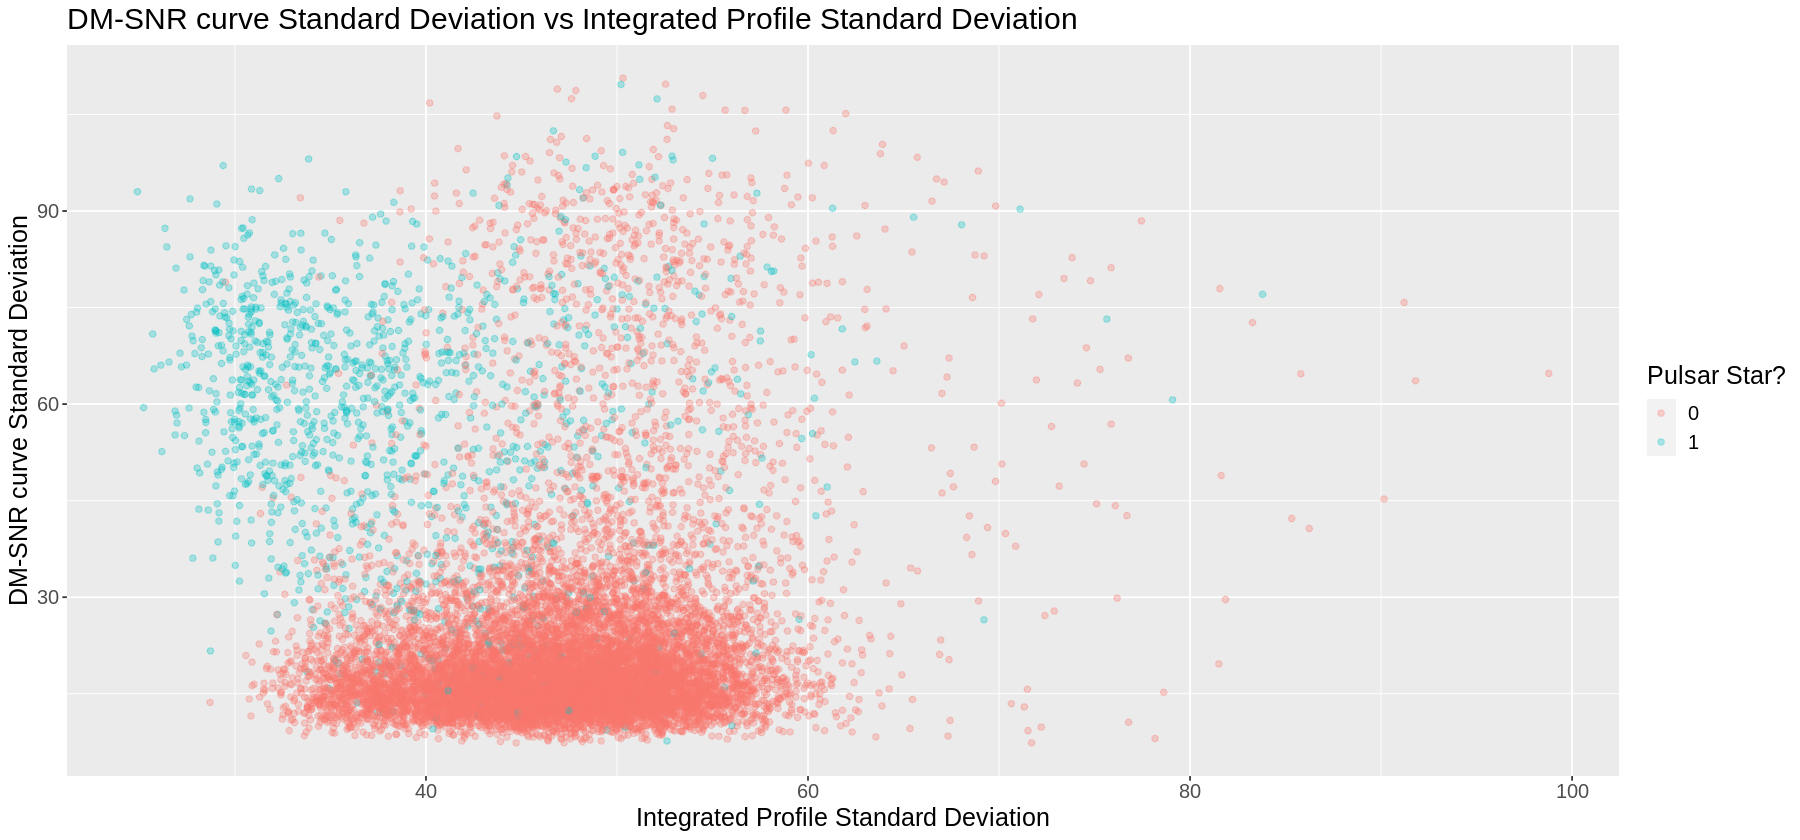

In [95]:
plot_3 <- ggplot(star_training_data, aes(x = integrated_profile_st_dev, y = dm_snr_curve_st_dev,
                         color = is_pulsar_star)) +
    geom_point(alpha=0.3) +
    labs(x = "Integrated Profile Standard Deviation",
         y = "DM-SNR curve Standard Deviation",
         color = "Pulsar Star?") +
    ggtitle("DM-SNR curve Standard Deviation vs Integrated Profile Standard Deviation") +
    theme(text = element_text(size = 15))
plot_3

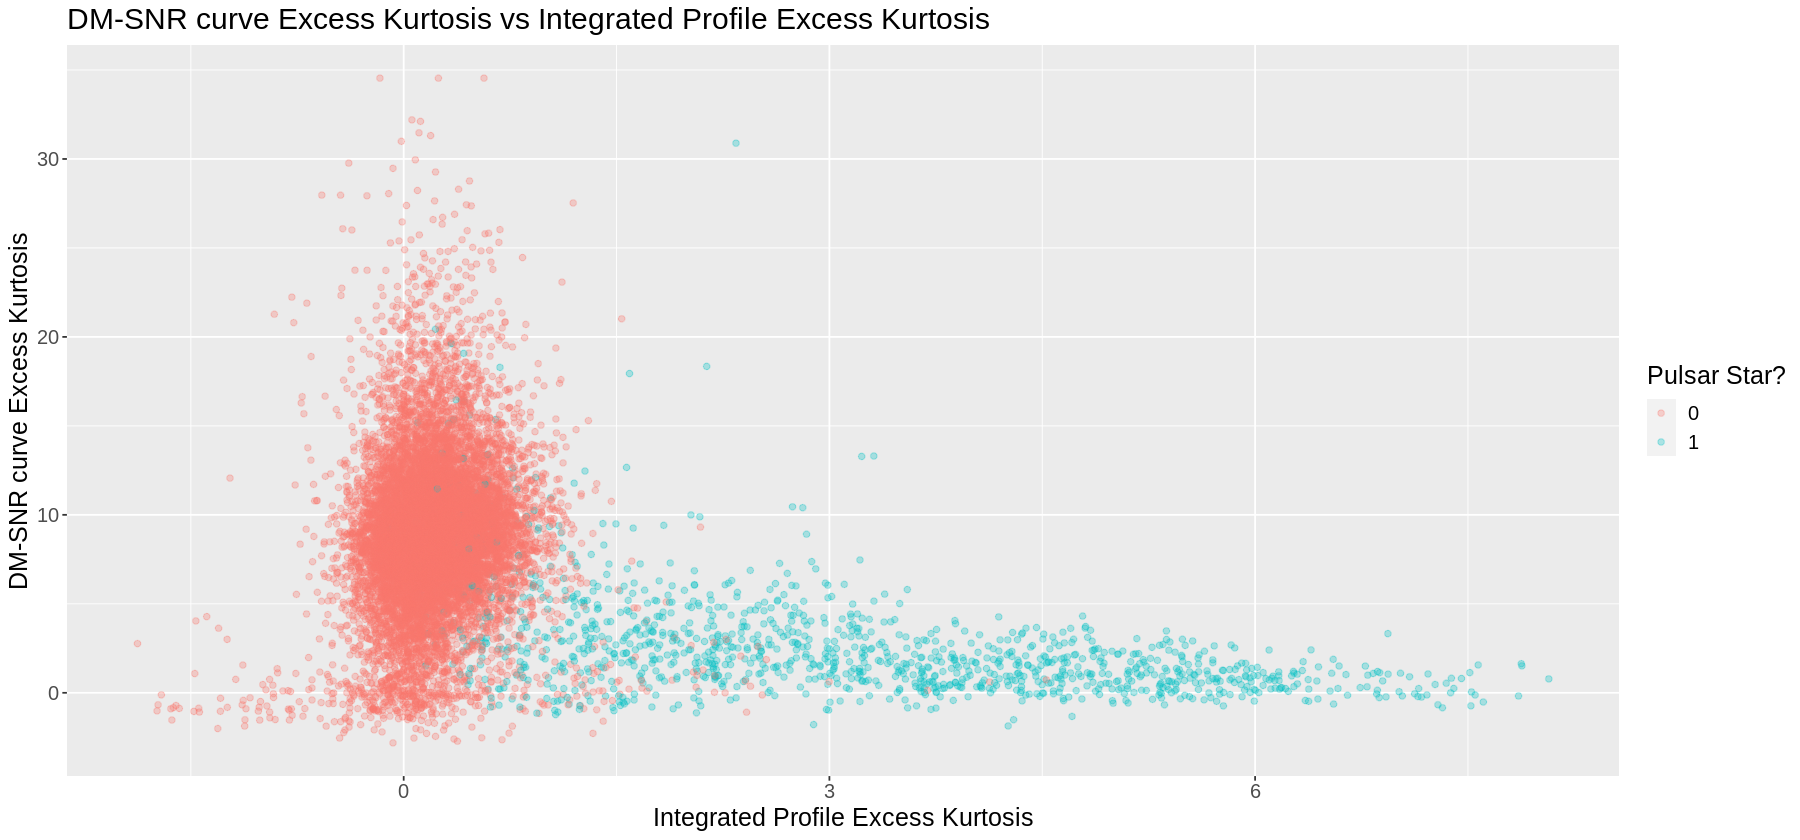

In [96]:
plot_4 <- ggplot(star_training_data, aes(x = integrated_profile_excess_kurtosis, y = dm_snr_curve_excess_kurtosis,
                         color = is_pulsar_star)) +
    geom_point(alpha=0.3) +
    labs(x = "Integrated Profile Excess Kurtosis",
         y = "DM-SNR curve Excess Kurtosis",
         color = "Pulsar Star?") +
    ggtitle("DM-SNR curve Excess Kurtosis vs Integrated Profile Excess Kurtosis") +
    theme(text = element_text(size = 15))
plot_4

- Putting plots together so they can be looked at all at once

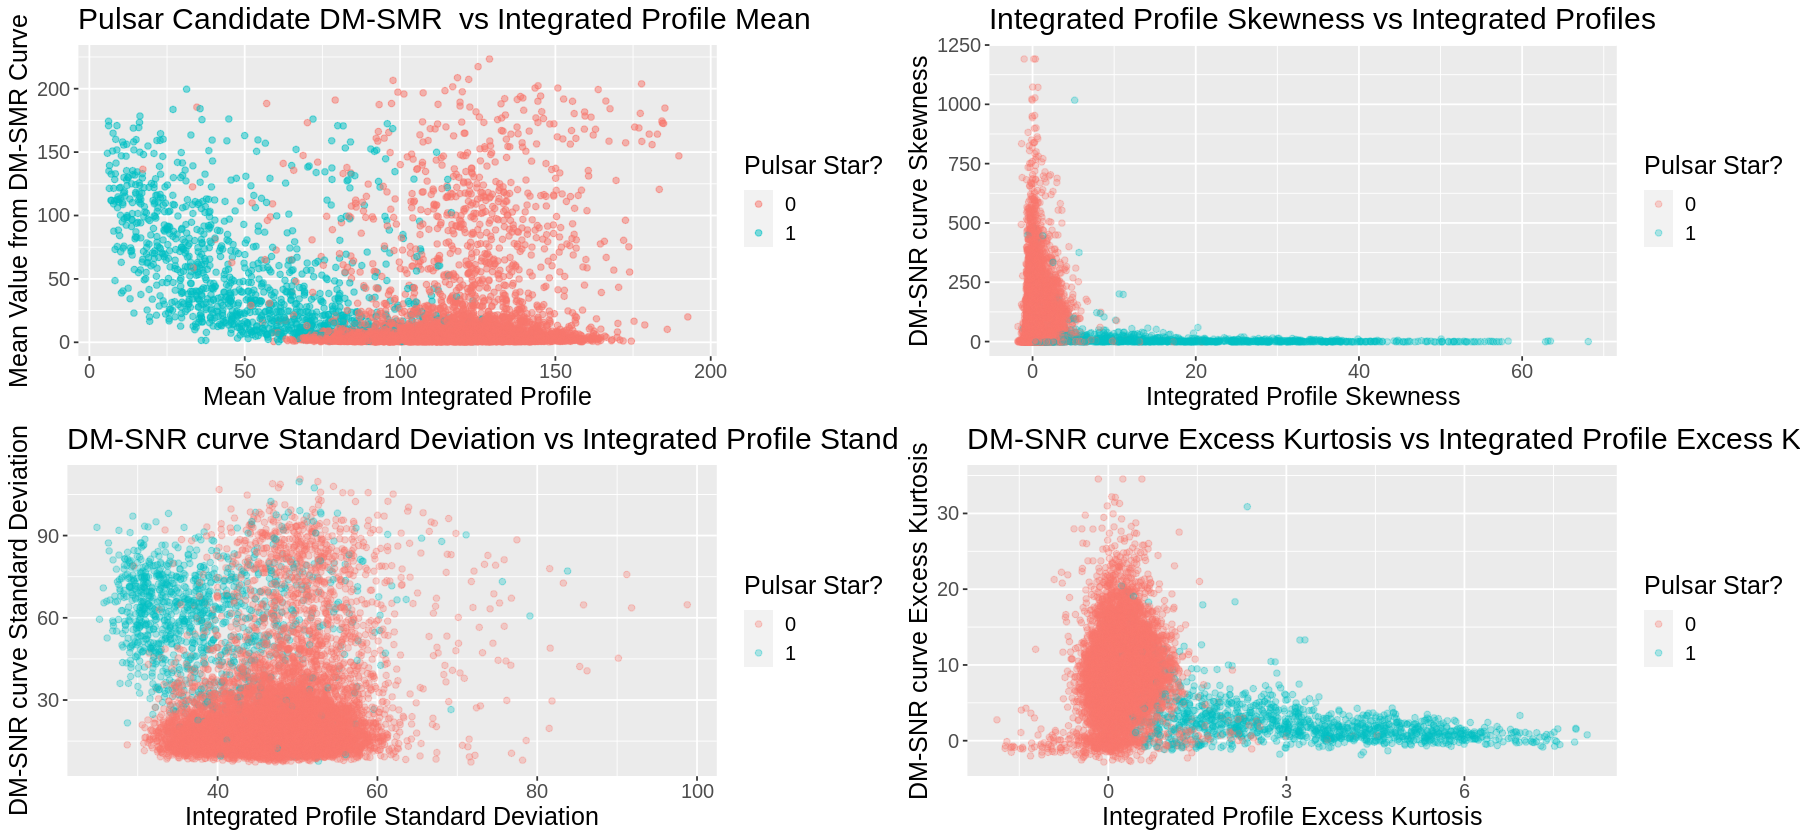

In [97]:
plot_grid(plot_1,plot_2,plot_3,plot_4)

As can be seen from above, pulsar stars seem to:
- smaller integrated profile means
- higher integrated profile skewness and lower DM-SNR skewness values
- higher DM-SNR standard deviations and lower integrated profile standard deviations
- higher integrated profile excess kurtosis values
than their false counterparts

- Standardized data using `mutate` and `scale`.

In [98]:
star_data_standardized <- star_training_data |>
    mutate(integrated_profile_mean = scale(integrated_profile_mean, center = TRUE),
           integrated_profile_std_dev = scale (integrated_profile_st_dev, center = TRUE),
           integrated_profile_excess_kurtosis = scale(integrated_profile_excess_kurtosis, center = TRUE),
           integrated_profile_skewness = scale(integrated_profile_skewness, center = TRUE),
           dm_snr_curve_mean = scale(dm_snr_curve_mean, center = TRUE),
           dm_snr_curve_st_dev = scale (dm_snr_curve_st_dev, center = TRUE),
           dm_snr_curve_excess_kurtosis = scale(dm_snr_curve_excess_kurtosis, center = TRUE),
           dm_snr_curve_skewness = scale(dm_snr_curve_skewness, center = TRUE))
sample_n(star_data_standardized, 5)

integrated_profile_mean,integrated_profile_st_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness,is_pulsar_star,integrated_profile_std_dev
"<dbl[,1]>",<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<fct>,"<dbl[,1]>"
0.32894418,47.45717,-0.2980119,-0.2623934,-0.3771817,-0.6321936,0.7277727,0.44075359,0,0.1405930
0.73910174,51.04024,-0.4878147,-0.3263280,-0.2169507,0.3439620,-0.6312650,-0.71397775,0,0.6668857
-0.25371813,53.65762,-0.3855221,-0.3704596,1.0250318,2.0054206,-1.6517883,-1.00143062,0,1.0513355
0.05122377,48.39752,-0.3617685,-0.3130165,-0.3532454,-0.4358053,0.2868211,-0.03279814,0,0.2787145
0.99663543,44.89180,-0.2882542,-0.2034518,-0.3305344,-0.5217921,0.1977802,0.04945468,0,-0.2362175


- Calculated means for each class with standardized data this time to see what changes using `group_by` and `summarize`.

In [99]:
star_means_table_standardized <- star_data_standardized |>
    group_by(is_pulsar_star)|>
    summarize(across(integrated_profile_mean:dm_snr_curve_skewness, mean))
star_means_table_standardized

is_pulsar_star,integrated_profile_mean,integrated_profile_st_dev,integrated_profile_excess_kurtosis,integrated_profile_skewness,dm_snr_curve_mean,dm_snr_curve_st_dev,dm_snr_curve_excess_kurtosis,dm_snr_curve_skewness
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.2125032,47.28100,-0.2505877,-0.2238561,-0.1287507,-0.1588611,0.125359,0.08283543
1,-2.1009033,38.77865,2.4774246,2.2131431,1.2728880,1.5705728,-1.239356,-0.81894882


# Methods

We will be using all the variables/columns because, in the thesis by Robert James Lyon, the features of the integrated profile and the DM-SNR curve are all crucial in determining pulsar stars(CITATION). We will conduct our data analysis using a standardized training and testing data set, perform cross validation, and pick the best K value by creating a RMSPE vs. Neighbors graph. We will visualize our data using a scatter plot as the different colors will allow us to see how accurate our training data is in predicting pulsar candidates from the test data.

# Expected outcomes and significance:


**Expectations**:

We expect to identify pulsar stars from the data of these variables. However, given any pulsar star candidate data, the candidates are more likely to be RFI or noise than a pulsar star. Therefore we expect a greater amount of negative classes, or non-pulsar stars.

**Possible Significance of Findings**:

These findings could aid in exploration of the interstellar medium. Only 2,000 pulsar stars have been discovered, therefore any additional discoveries will be of significant impact in the field of astronomy. (2)


**Future questions this could lead to:**

How old are the pulsar stars found?
How can precise measurements of the pulsar stars sizes and masses be determined?



### Sources

(1)https://academic.oup.com/mnras/article/409/2/619/1037409#92347136

(2)https://www.nasa.gov/feature/goddard/2017/nasa-continues-to-study-pulsars-50-years-after-their-chance-discovery

(3)https://giphy.com/gifs/nasa-space-universe-l3dj5M4YLaFww31V6